<a href="https://colab.research.google.com/github/ReynaldiGM/DS_Journey/blob/main/LongAssignment_Reynaldi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : Reynaldi Gevin

Netflix Movies and TV Shows on Netflix Dataset

# Connect to Google Drive

In [387]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [388]:
%cd /content/gdrive/MyDrive/Data Science/First Project

/content/gdrive/MyDrive/Data Science/First Project


# Import Packages

In [462]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected= True)


# Import Data

In [425]:
df = pd.read_csv('netflix_titles.csv')


# Initial EDA

In [426]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [427]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [428]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1454,s1455,Movie,Good Hair,Jeff Stilson,"Chris Rock, Nia Long, Maya Angelou, Ice-T, Eve...",United States,"January 1, 2021",2009,PG-13,96 min,Documentaries,Chris Rock hops around the world going from be...
1384,s1385,TV Show,Busted!,NaN,"Yoo Jae-suk, Ahn Jae-wook, Kim Jong-min, Lee K...",South Korea,"January 22, 2021",2021,TV-14,3 Seasons,"Crime TV Shows, International TV Shows, Korean...",Tackling different mysteries in each episode o...
8113,s8114,Movie,Suckseed,Chayanop Boonprakob,"Jirayu La-ongmanee, Pachara Chirathivat, Natta...",Thailand,"September 5, 2018",2011,TV-MA,130 min,"Comedies, International Movies, Music & Musicals","When his boyhood crush Ern returns, Ped forms ..."
3802,s3803,Movie,The Lonely Island Presents: The Unauthorized B...,"Mike Diva, Akiva Schaffer","Andy Samberg, Akiva Schaffer, Jorma Taccone, H...",NaN,"May 23, 2019",2019,TV-MA,30 min,"Comedies, Music & Musicals, Sports Movies",The Lonely Island spoofs notorious baseball st...
5256,s5257,Movie,Out of Thin Air,Dylan Howitt,NaN,NaN,"September 29, 2017",2017,TV-MA,85 min,"Documentaries, International Movies",Picking up 40 years after six were convicted f...


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning

## Handling Missing Value 

In [430]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [431]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [432]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= show_id =================


s7755    1
s7158    1
s2453    1
s2954    1
s6618    1
        ..
s1905    1
s857     1
s5413    1
s6201    1
s7228    1
Name: show_id, Length: 8807, dtype: int64


============= type =================


Movie      6131
TV Show    2676
Name: type, dtype: int64


============= title =================


The Year of Happiness and Love            1
High Score                                1
Dilan 1990                                1
Tiger King: Murder, Mayhem and Madness    1
Olmo & the Seagull                        1
                                         ..
Nazi Mega Weapons                         1
The Show                                  1
Find Yourself                             1
Things Heard & Seen                       1
Monkey Planet                             1
Name: title, Length: 8807, dtype: int64


============= director =================


Rajiv Chilaka                  19
Raúl Campos, Jan Suter         18
Marcus Raboy                   16
Suhas Kadav                    16
Jay Karas                      14
                               ..
Chow Hin Yeung Roy              1
Jos Humphrey                    1
Luke Snellin                    1
Sadeq Behbehani                 1
Hugues Nancy, Fabien Beziat     1
Name: director, Length: 4528, dtype: int64


============= cast =================


David Attenborough                                                                                                                                 19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                            14
Samuel West                                                                                                                                        10
Jeff Dunham                                                                                                                                         7
David Spade, London Hughes, Fortune Feimster                                                                                                        6
                                                                                                                                                   ..
Petrônio Gontijo, Day Mesquita, Beth Goulart, Dalton Vigh, Eduardo Galvão, André Gonçalves, Marcello


============= country =================


United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Netherlands, Germany, Italy, Canada                 1
China, Hong Kong, United States                     1
Czech Republic, United Kingdom, United States       1
France, Canada, United States                       1
Canada, United States, Denmark                      1
Name: country, Length: 748, dtype: int64


============= date_added =================


January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
March 2, 2016          1
November 16, 2017      1
February 11, 2019      1
May 7, 2017            1
May 10, 2021           1
Name: date_added, Length: 1767, dtype: int64


============= release_year =================


2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64


============= rating =================


TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64


============= duration =================


1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
93 min        146
             ... 
10 min          1
205 min         1
203 min         1
191 min         1
273 min         1
Name: duration, Length: 220, dtype: int64


============= listed_in =================


Dramas, International Movies                              362
Documentaries                                             359
Stand-Up Comedy                                           334
Comedies, Dramas, International Movies                    274
Dramas, Independent Movies, International Movies          252
                                                         ... 
Action & Adventure, Anime Features                          1
Classic & Cult TV, TV Sci-Fi & Fantasy                      1
Action & Adventure, Comedies, Horror Movies                 1
Anime Features, International Movies, Sci-Fi & Fantasy      1
TV Horror, TV Mysteries, Teen TV Shows                      1
Name: listed_in, Length: 514, dtype: int64


============= description =================


Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
This educational series for tiny tots features a toe-tapping spin on nursery rhymes with upbeat tunes and a diverse set of easy-to-follow lessons.           2
                                                                                                                                                            ..
What is anime? Through deep-dives with notable

Di kolom rating ada cell dengan format data yang salah, letaknya harusnya berada di kolom duration

In [433]:
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


3 data tersebut dikembalikan ke kolom duration

In [434]:
df.loc[5541,'duration'] = '74 min'
df.loc[5794,'duration'] = '84 min'
df.loc[5813,'duration'] = '66 min'

Pada kolom rating diisi nilai yang masih kosong dengan cara mencari ratingnya di google, begitu juga untuk 3 kolom yang sebelumnya

In [435]:
df.loc[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [436]:
# 3 rows mistaken:

df.loc[5541,'rating'] = 'TV-MA'
df.loc[5794,'rating'] = 'R'
df.loc[5813,'rating'] = 'R'

# 3 rows with missing value:

df.loc[5989,'rating'] = 'PG-13'
df.loc[6827,'rating'] = 'TV-14'
df.loc[7312,'rating'] = 'TV-MA'
df.loc[7537,'rating'] = 'PG-13'

Check again gaes!

In [437]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Fix date_added column

In [438]:
df.loc[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [439]:
df.loc[6066,'rating'] = 'September 15, 2014'
df.loc[6174,'rating'] = 'June 1, 2020'
df.loc[6806,'rating'] = 'September 17, 2020'
df.loc[6901,'rating'] = 'January 4, 2016'
df.loc[7196,'rating'] = 'July 6, 2017'
df.loc[7406,'rating'] = 'June 1, 2015'
df.loc[7847,'rating'] = 'September 15, 2014'
df.loc[8182,'rating'] = 'October 3, 2017'

# Cant find on google
df = df[df['date_added'].notna()]


In [440]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Finish for date_added

Director and Cast fill with ' No data Available'
 and Country fill with mode

In [441]:
df['director'] = df['director'].fillna('NoDataAvailable')
df['cast'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [442]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Check Duplicate Row

In [444]:
len(df.drop_duplicates()) / len(df)

1.0

Since the number is 1.0, we conclude that there are no duplicate rows in this dataset

## Add New Features

Add new features in data set : target_ages and principal_country

Country fix up

There are some entry where country has multiple values. so i think i will add a new column with just the first one.

In [445]:
df['country'].value_counts()

United States                                    3642
India                                             972
United Kingdom                                    418
Japan                                             244
South Korea                                       199
                                                 ... 
Netherlands, Germany, Italy, Canada                 1
China, Hong Kong, United States                     1
Czech Republic, United Kingdom, United States       1
France, Canada, United States                       1
Canada, United States, Denmark                      1
Name: country, Length: 748, dtype: int64

In [446]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,NoDataAvailable,NoDataAvailable,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States
3,s4,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States
4,s5,TV Show,Kota Factory,NoDataAvailable,NoDataAvailable,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            8797 non-null   object
 1   type               8797 non-null   object
 2   title              8797 non-null   object
 3   director           8797 non-null   object
 4   cast               8797 non-null   object
 5   country            8797 non-null   object
 6   date_added         8797 non-null   object
 7   release_year       8797 non-null   int64 
 8   rating             8797 non-null   object
 9   duration           8797 non-null   object
 10  listed_in          8797 non-null   object
 11  description        8797 non-null   object
 12  principal_country  8797 non-null   object
dtypes: int64(1), object(12)
memory usage: 962.2+ KB


Shows targets based on rating
This could be interesting to show wich is target mostly focused by productions

https://movielabs.com/md/ratings/v2.3/html/US_TVPG_Ratings.html for TV Rating

https://atlascinemas.net/ratings.html for Movie Rating

In [447]:
ratings_ages = {
    'TV-PG': 'Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [448]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Kids'], dtype=object)

In [449]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Teens
1,s2,TV Show,Blood & Water,NoDataAvailable,NoDataAvailable,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States,Adults
3,s4,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States,Adults
4,s5,TV Show,Kota Factory,NoDataAvailable,NoDataAvailable,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,Adults
8803,s8804,TV Show,Zombie Dumb,NoDataAvailable,NoDataAvailable,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",United States,Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,Kids


## Fix Data Types

In [450]:
# type should be a category
df['type'] = pd.Categorical(df['type'])
# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   show_id            8797 non-null   object  
 1   type               8797 non-null   category
 2   title              8797 non-null   object  
 3   director           8797 non-null   object  
 4   cast               8797 non-null   object  
 5   country            8797 non-null   object  
 6   date_added         8797 non-null   object  
 7   release_year       8797 non-null   int64   
 8   rating             8797 non-null   object  
 9   duration           8797 non-null   object  
 10  listed_in          8797 non-null   object  
 11  description        8797 non-null   object  
 12  principal_country  8797 non-null   object  
 13  target_ages        8797 non-null   category
dtypes: category(2), int64(1), object(11)
memory usage: 910.9+ KB


In [452]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

# Lets Explore

In [ ]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['genre'].head()

movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

show_df.head()

In [454]:
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 1. Conten Type on Netflix

In [453]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#b20710", "#f5f5f1"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

## Netflix Content Added Year

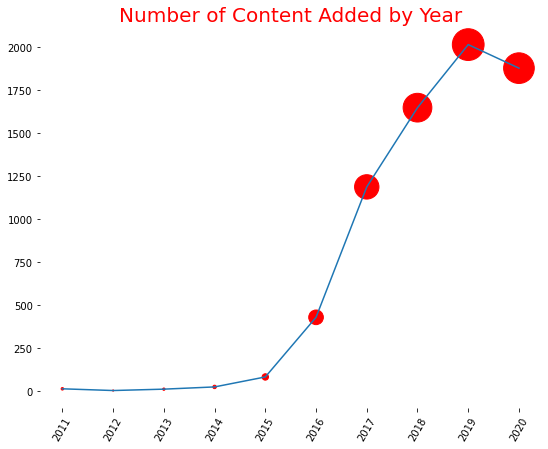

In [421]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

added = df['year_added'].value_counts()
added = added.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(added[-11:-1])
plt.scatter(added[-11:-1].index, added[-11:-1].values, s=0.5*added[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(added[-11:-1].index);
plt.title('Number of Content Added by Year', color='red', fontsize=20);

## Most content producing countries

In [464]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [422]:
## Movies countrywise distribution

Movies = df[df['type'] == 'Movie']


Movi_country = Movies.country.value_counts()

Movi_coun = {}
for idx, val in Movi_country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in Movi_coun.keys():
            d = {}
            d[i] = val + Movi_coun[i]
            Movi_coun.update(d)
        else:
            d = {i:val}
            Movi_coun.update(d)

Movi_nation, Movi_count = [],[]
for idx, val in Movi_coun.items():
    Movi_nation.append(idx)
    Movi_count.append(val)

Movi_temp = (pd.DataFrame({'country':Movi_nation, 'count': Movi_count})
        .sort_values('count', ascending = False))

Movi_temp['color'] = Movi_temp['count'].apply(lambda x : '#b20710' if x > Movi_temp['count'].values[3] else 'grey')

NameError: ignored

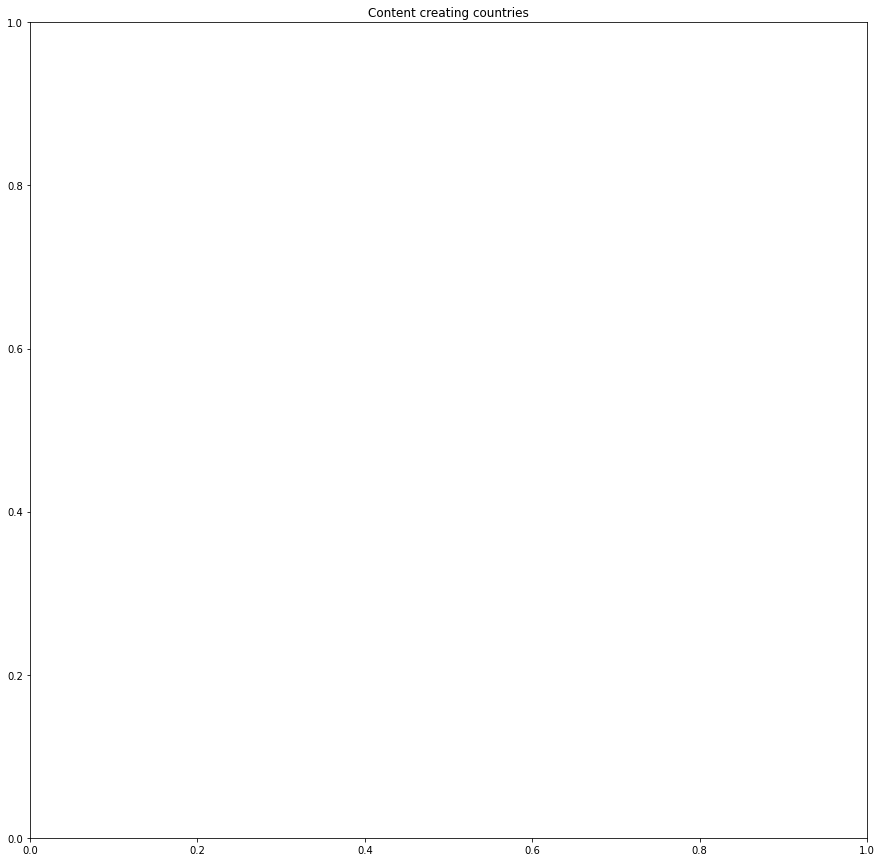

In [423]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))


## 

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country,year_added,month_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,2021,September,Teens
1,s2,TV Show,Blood & Water,NoDataAvailable,NoDataAvailable,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,2021,September,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,Julien Leclercq,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States,2021,September,Adults
3,s4,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States,2021,September,Adults
4,s5,TV Show,Kota Factory,NoDataAvailable,NoDataAvailable,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,2021,September,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,2019,November,Adults
8803,s8804,TV Show,Zombie Dumb,NoDataAvailable,NoDataAvailable,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",United States,2019,July,Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,2019,November,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,2020,January,Kids


## best month

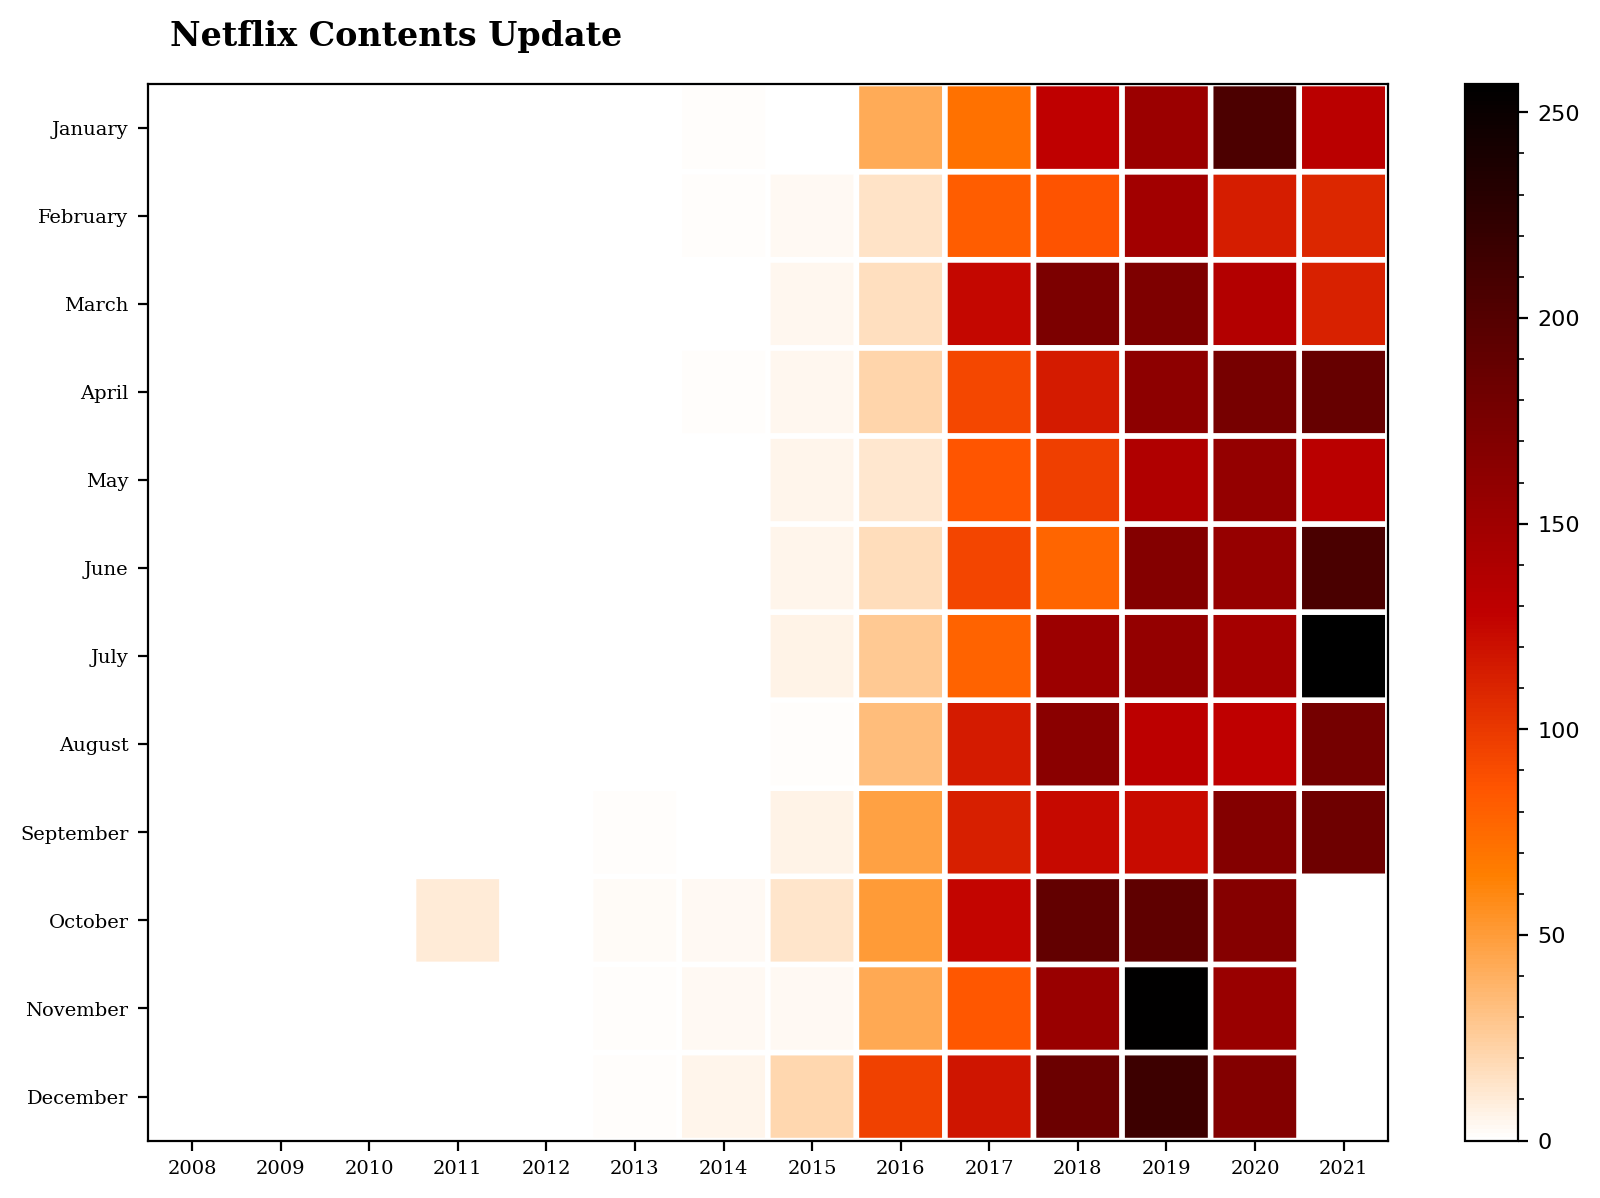

In [ ]:
netflix_date = df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## target ages

In [455]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

In [457]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [463]:
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()